In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\USER\Desktop\intro_ML\train.csv", index_col="ID")
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [3]:
#para un análisis posterior
similarity = (data["F_TIENEINTERNET"] == data["F_TIENEINTERNET.1"]).mean()
print(similarity)

0.9615465703971119


([0, 1, 2, 3],
 [Text(0, 0, 'medio-alto'),
  Text(1, 0, 'bajo'),
  Text(2, 0, 'alto'),
  Text(3, 0, 'medio-bajo')])

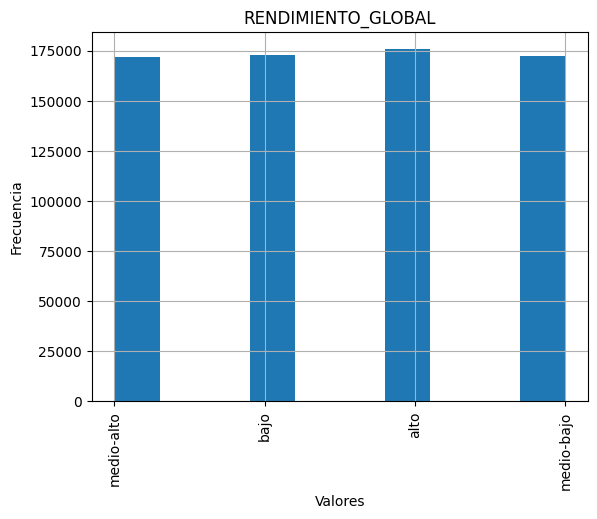

In [4]:
#variable objetivo
data["RENDIMIENTO_GLOBAL"].hist()
plt.title("RENDIMIENTO_GLOBAL")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

Se ve que la variable objetivo sigue un orden (bajo -> medio bajo -> medio alto -> alto), así que al codificarla, éste se debe mantener

In [5]:
#tratamiento de variable objetivo
orden = ["bajo", "medio-bajo", "medio-alto", "alto"]
data['RENDIMIENTO_GLOBAL'] = pd.Categorical(data['RENDIMIENTO_GLOBAL'], ordered=True, categories=orden)
data['RENDIMIENTO_GLOBAL'] = data['RENDIMIENTO_GLOBAL'].cat.codes  # convierte a 0,1,2,3
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,2,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,0,0.297,0.214,0.305,0.264
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,3,0.485,0.172,0.252,0.190
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,1,0.316,0.232,0.285,0.294


RENDIMIENTO_GLOBAL
3    175619
0    172987
1    172275
2    171619
Name: count, dtype: int64

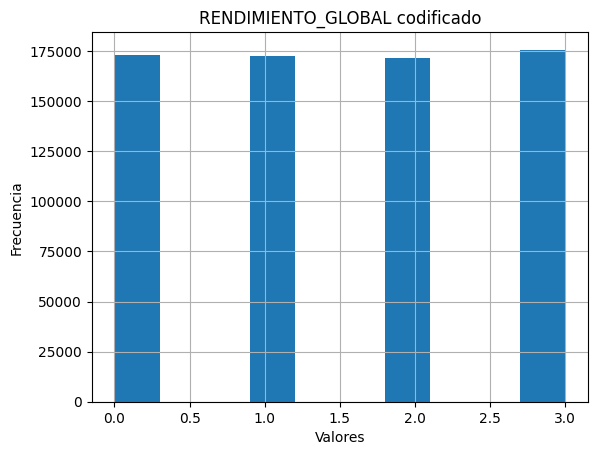

In [6]:
data["RENDIMIENTO_GLOBAL"].hist()
plt.title("RENDIMIENTO_GLOBAL codificado")
plt.xlabel("Valores")   
plt.ylabel("Frecuencia")
data["RENDIMIENTO_GLOBAL"].value_counts()

Valores nulos

In [7]:
#ahora mirar si hay valores nulos
k = data.isna().sum()
k[k!=0]

E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
dtype: int64

En vista de que hay valores nulos en el dataset, hay que inspeccionar si estos podrían ser aparentemente relevantes respecto a la variable objetivo. Para esto se debe asignaré un valor a los nulos para visualizarlos en la rutina de la clase

In [8]:
d = data.fillna("sin_dato") #copia del dataset original, pero con nulos rellenados

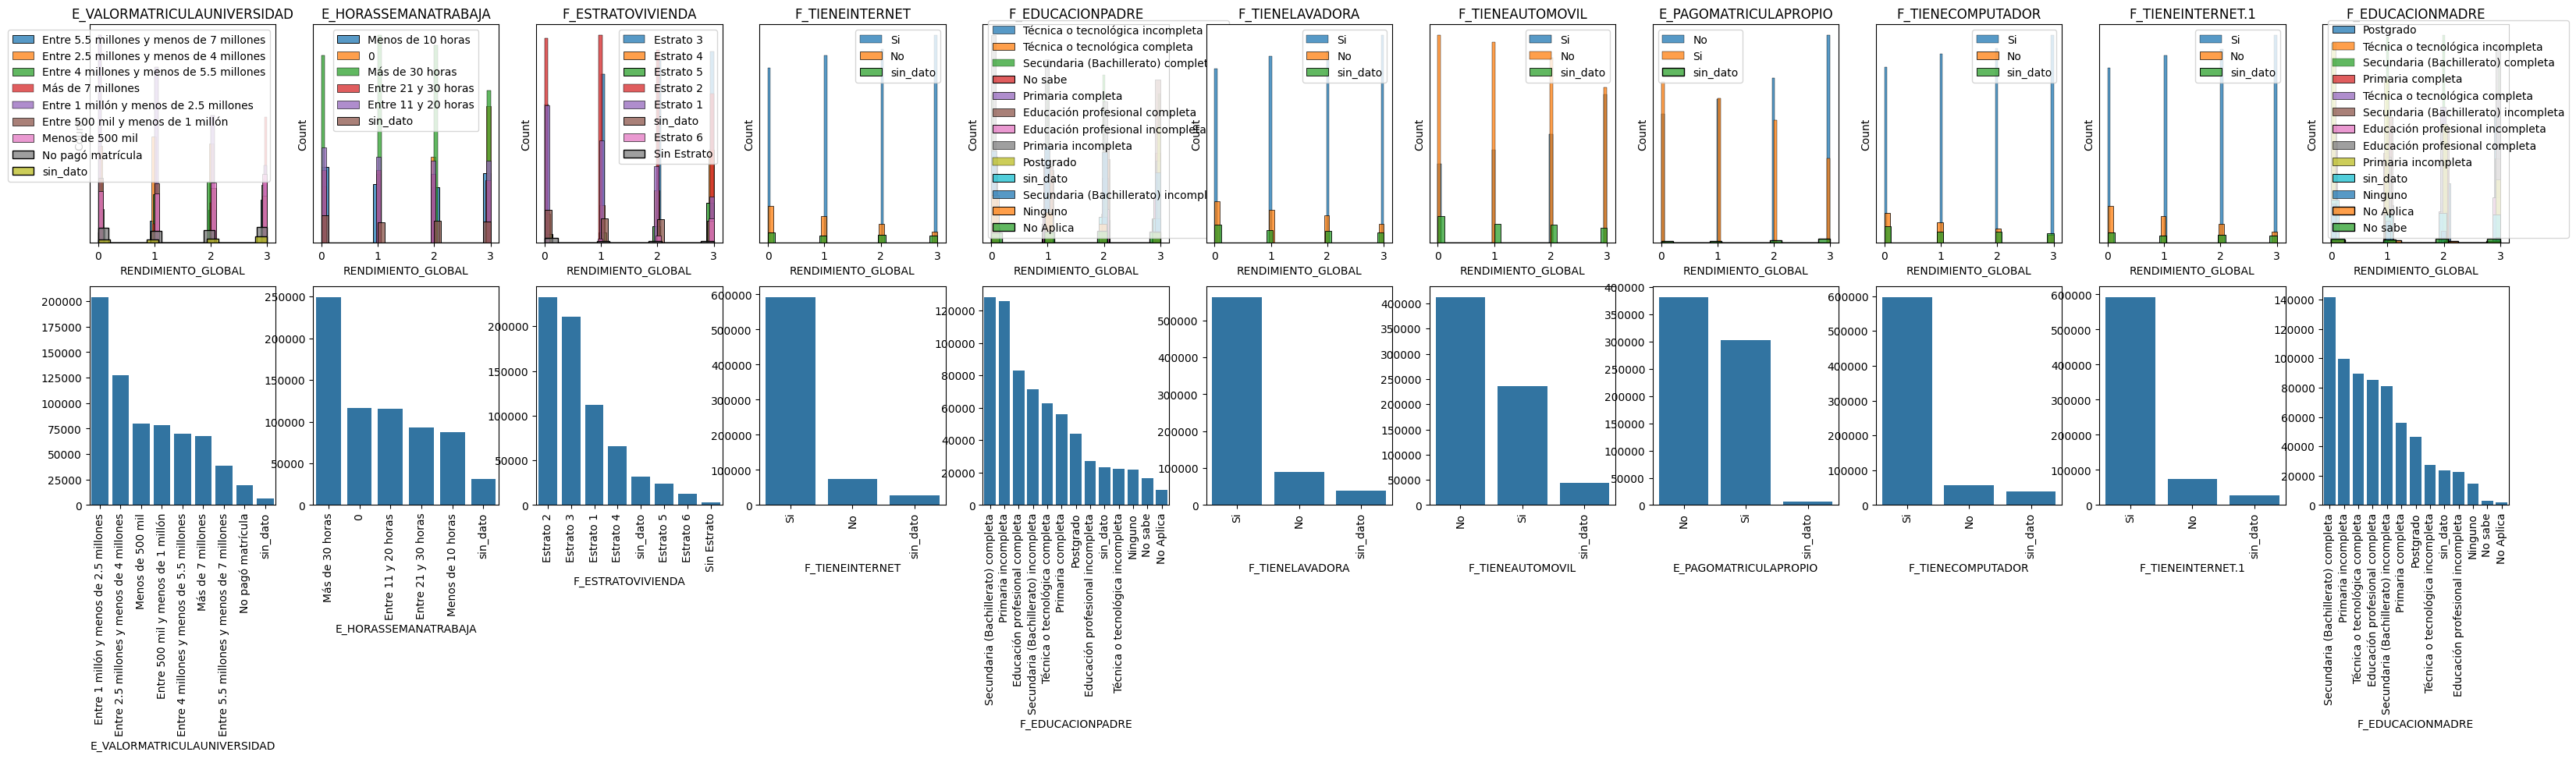

In [9]:
plt.figure(figsize=(40,8))
for i,c in enumerate(["E_VALORMATRICULAUNIVERSIDAD","E_HORASSEMANATRABAJA", "F_ESTRATOVIVIENDA", "F_TIENEINTERNET", "F_EDUCACIONPADRE", "F_TIENELAVADORA", "F_TIENEAUTOMOVIL", "E_PAGOMATRICULAPROPIO", "F_TIENECOMPUTADOR", "F_TIENEINTERNET.1","F_EDUCACIONMADRE"  ]):
    plt.subplot(2,11,i+1)
    k=d[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in d[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,11,i+12)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

De las graficas se observa que los datos nulos no representan en general una parte significativa de ninguna categoría. De todas formas se verifica por codigo:

In [10]:
nan_percent = (data.isna().mean()*100).sort_values(ascending=False)
print("Porcentaje de NaNs por columna:")
print(nan_percent)


Porcentaje de NaNs por columna:
F_TIENEAUTOMOVIL               6.299350
F_TIENELAVADORA                5.743394
F_TIENECOMPUTADOR              5.502238
F_ESTRATOVIVIENDA              4.640722
E_HORASSEMANATRABAJA           4.455884
F_TIENEINTERNET                3.845343
F_TIENEINTERNET.1              3.845343
F_EDUCACIONMADRE               3.417184
F_EDUCACIONPADRE               3.347004
E_PAGOMATRICULAPROPIO          0.938339
E_VALORMATRICULAUNIVERSIDAD    0.907870
PERIODO_ACADEMICO              0.000000
E_PRGM_DEPARTAMENTO            0.000000
E_PRGM_ACADEMICO               0.000000
E_PRIVADO_LIBERTAD             0.000000
RENDIMIENTO_GLOBAL             0.000000
INDICADOR_1                    0.000000
INDICADOR_2                    0.000000
INDICADOR_3                    0.000000
INDICADOR_4                    0.000000
dtype: float64


El porcentaje de valores nulos en el dataset en cada categoria es bajo (menor del 7%) por lo que estos valores podrían no ser representativos para el modelo. Sin embargo no considero pertinente eliminarlos porque estos brindan una información que podría ser relevante: indican si el estudiante rellenó o no la encuesta completamente. De esta forma se tendría una nueva métrica binaria que determina si la información del estudiante está completa o no

In [11]:
#Se crea la nueva columna
#True si el registro no tiene ningun valor nulo, False en caso contrario
data["DATOS_COMPLETOS"] = data.isna().sum(axis=1) == 0
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,...,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,DATOS_COMPLETOS
ID,,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,...,No,Si,Si,Postgrado,2,0.322,0.208,0.310,0.267,True
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,...,No,Si,No,Técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264,True
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,...,No,No,Si,Secundaria (Bachillerato) completa,0,0.297,0.214,0.305,0.264,True
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,...,No,Si,Si,Secundaria (Bachillerato) completa,3,0.485,0.172,0.252,0.190,True
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,...,No,Si,Si,Primaria completa,1,0.316,0.232,0.285,0.294,True


In [12]:
data["DATOS_COMPLETOS"].value_counts()

DATOS_COMPLETOS
True     628896
False     63604
Name: count, dtype: int64

Se ve que si se eliminan los estudiantes con información vacía, se perdería aproximadamente un 10% de los datos

Teniendo esto así, ahora sí se le asigna un valor a los nulos al dataset (lo anterior se le hizo a una copia)

In [13]:
data = data.fillna("sin_dato") #rellenar nulos

In [14]:
#verificación de que no hay nulos
data.isna().sum()

PERIODO_ACADEMICO              0
E_PRGM_ACADEMICO               0
E_PRGM_DEPARTAMENTO            0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
F_EDUCACIONPADRE               0
F_TIENELAVADORA                0
F_TIENEAUTOMOVIL               0
E_PRIVADO_LIBERTAD             0
E_PAGOMATRICULAPROPIO          0
F_TIENECOMPUTADOR              0
F_TIENEINTERNET.1              0
F_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL             0
INDICADOR_1                    0
INDICADOR_2                    0
INDICADOR_3                    0
INDICADOR_4                    0
DATOS_COMPLETOS                0
dtype: int64

Columnas repetidas

Se observa que hay un par de columnas que podrían ser repetidas, hay que verificar

In [15]:
similarity = (data["F_TIENEINTERNET"] == data["F_TIENEINTERNET.1"]).mean()
print(similarity)

1.0


Se ve que ambas columnas son iguales, por lo tanto una es una copia de la otra y se procede a eliminarla

In [16]:
data = data.drop(columns=["F_TIENEINTERNET.1"])
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,DATOS_COMPLETOS
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,2,0.322,0.208,0.310,0.267,True
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264,True
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,0,0.297,0.214,0.305,0.264,True
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,3,0.485,0.172,0.252,0.190,True
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,1,0.316,0.232,0.285,0.294,True


Ahora a revisar las categorias de cada variable

In [17]:
data.nunique().sort_values(ascending=False)

E_PRGM_ACADEMICO               948
INDICADOR_1                    375
INDICADOR_2                    342
INDICADOR_4                    276
INDICADOR_3                    196
E_PRGM_DEPARTAMENTO             31
F_EDUCACIONPADRE                13
F_EDUCACIONMADRE                13
E_VALORMATRICULAUNIVERSIDAD      9
PERIODO_ACADEMICO                9
F_ESTRATOVIVIENDA                8
E_HORASSEMANATRABAJA             6
RENDIMIENTO_GLOBAL               4
F_TIENEINTERNET                  3
F_TIENEAUTOMOVIL                 3
F_TIENELAVADORA                  3
F_TIENECOMPUTADOR                3
E_PAGOMATRICULAPROPIO            3
E_PRIVADO_LIBERTAD               2
DATOS_COMPLETOS                  2
dtype: int64

La única variable con muchas categorias es la del programa académico, como se visualizaba en la exploración de los datos. Eso podría generar problemas en el modelo -> arreglar

In [18]:
#a ver los primeros valores...
data['E_PRGM_ACADEMICO'].value_counts().head(10)

E_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64

In [19]:
#filtrar las categorias menos frecuentes
(data['E_PRGM_ACADEMICO'].value_counts() < 10).sum()

np.int64(93)

In [20]:
data['E_PRGM_ACADEMICO'].value_counts().tail(200)

E_PRGM_ACADEMICO
ARQUEOLOGIA                                               28
PROFESIONAL EN DISEÑO GRÁFICO                             28
INGENIERÍA DE PETRÓLEOS                                   28
MUSICA INSTRUMENTO                                        27
PROFESIONAL EN GASTRONOMÍA                                27
                                                          ..
DEPORTE Y ACTIVIDADA FISICA                                1
QUIMICA Y FARMACIA                                         1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES     1
COMUNICACIÓN SOCIAL Y PERIODISMO                           1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                      1
Name: count, Length: 200, dtype: int64

Como hay muchas categorias poco frecuentes puede ser bueno agruparlas en una nueva categoria como "otros programas" pues dejarlas así sólo aplicaría ruido al modelo

Para esto determinaré un umbral que me abarque un 95% de los estudiantes. Este valor lo decido de manera arbitraria

In [21]:
freq = data['E_PRGM_ACADEMICO'].value_counts()
acum = freq.cumsum() / freq.sum() # Cálculo de acumulado porcentual
umbral = freq[acum <= 0.95].min()
umbral

np.int64(171)

In [22]:
df=data.copy() #copia del dataset por si acaso

In [41]:
#teniendo el umbral, se procede con la agrupación
frecuencias = df['E_PRGM_ACADEMICO'].value_counts()
categorias_pequenas = frecuencias[frecuencias < umbral].index

df['E_PRGM_ACADEMICO_AGRUPADO'] = df['E_PRGM_ACADEMICO'].replace(categorias_pequenas, 'OTRO_PROGRAMA')

In [42]:
df['E_PRGM_ACADEMICO_AGRUPADO'].value_counts()

E_PRGM_ACADEMICO_AGRUPADO
DERECHO                                                                     53244
ADMINISTRACION DE EMPRESAS                                                  51902
CONTADURIA PUBLICA                                                          39664
OTRO_PROGRAMA                                                               34609
PSICOLOGIA                                                                  31932
                                                                            ...  
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN TECNOLOGIA E INFORMATICA      172
ADMINISTRACION LOGISTICA                                                      172
LICENCIATURA EN LENGUAS EXTRANJERAS INGLES-FRANCES                            172
INTRUMENTACION QUIRURGICA                                                     171
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES E IDIOMAS         171
Name: count, Length: 346, dtype: int64

Quedaron 346 programas de los 948. Hubo una reducción significativa, aunque posiblemente queden demasiados todavía. 
Así que miraré la alternativa de ordenar los programas y juntar los que tengan un promedio similar par areducirlo a unos 40 grupos

In [25]:
df=data.copy() #copia del dataset por si acaso

In [26]:
#media del rendimiento por programa
media_rend = df.groupby('E_PRGM_ACADEMICO')['RENDIMIENTO_GLOBAL'].mean()
#40 grupos ordenados por rendimiento
clusters = pd.qcut(media_rend, q=40, labels=False)
# 3.clusters
df['E_PRGM_ACADEMICO_AGRUPADO'] = df['E_PRGM_ACADEMICO'].map(clusters)

In [27]:
df['E_PRGM_ACADEMICO_AGRUPADO'].value_counts().nunique()


39

In [28]:
df["E_PRGM_ACADEMICO_AGRUPADO"].value_counts()

E_PRGM_ACADEMICO_AGRUPADO
13    68126
21    57470
7     56789
23    54569
10    45312
17    44783
26    25241
19    23987
32    23267
8     23267
2     23097
28    19061
25    15512
31    15128
15    14973
24    14577
22    13297
18    12093
4     11709
12    10916
1     10783
3     10677
11    10319
36    10056
27     8120
29     7248
5      6982
30     6811
14     6386
20     6335
34     5900
37     5733
16     5033
9      3825
35     3300
33     3184
0      2715
6      2685
38     2637
39      597
Name: count, dtype: int64

Quedaron 39 categorias. No sé cómo esto pueda afectar el entrenamiento de los modelos, así que probaré con ambas opciones cuando esté diseñandolos

Igual queda una tercera opción que es la de borrar la variable. Pero no la considero pertinente porqur podría ser una pérdida significativa de información que puede ser relevante

Por ahora a seguir con el resto del dataset

In [29]:
#revisión estadística de las variables numéricas (indicadores)
num_cols = data.select_dtypes(include=['float64']).columns.tolist()

print(data[num_cols].describe(percentiles=[0.01,0.05,0.5,0.95,0.99]))


         INDICADOR_1    INDICADOR_2    INDICADOR_3    INDICADOR_4
count  692500.000000  692500.000000  692500.000000  692500.000000
mean        0.268629       0.259996       0.262087       0.262903
std         0.122130       0.093480       0.058862       0.067944
min         0.000000       0.000000       0.000000       0.000000
1%          0.011000       0.011000       0.011000       0.011000
5%          0.129000       0.112000       0.190000       0.117000
50%         0.240000       0.271000       0.276000       0.285000
95%         0.529000       0.414000       0.312000       0.323000
99%         0.629000       0.427000       0.318000       0.329000
max         0.657000       0.487000       0.320000       0.332000


Creo que están bien así que las dejaré así

Con esto el tratamiento de los datos está completo, solo falta codificarlos

In [30]:
#binarias
binarias = [
    "F_TIENEINTERNET",
    "F_TIENELAVADORA",
    "F_TIENEAUTOMOVIL",
    "E_PAGOMATRICULAPROPIO",
    "F_TIENECOMPUTADOR",
    "E_PRIVADO_LIBERTAD"
]

for col in binarias:
    data[col] = (
        data[col]
        .astype(str)
        .str.strip()
        .str.upper()
        .replace({
            "SI": 1, "S": 1,
            "NO": 0, "N": 0,
            "SIN_DATO": -1
        })
    )


C:\Users\USER\AppData\Local\Temp\ipykernel_18912\3292496347.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_18912\3292496347.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_18912\3292496347.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

In [31]:
data[binarias].head(10)

,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,E_PRIVADO_LIBERTAD
ID,,,,,,
904256,1,1,1,0,1,0
645256,0,1,0,0,1,0
308367,1,1,0,0,0,0
470353,1,1,0,0,1,0
989032,1,1,1,0,1,0
659872,1,1,1,0,1,0
47159,1,1,1,1,1,0
11829,1,1,0,1,0,0
257869,1,1,1,1,1,0


In [32]:
#ordinales
# Codificación para E_VALORMATRICULAUNIVERSIDAD
map_matricula = {
    "Menos de 500 mil": 1,
    "Entre 500 mil y menos de 1 millón": 2,
    "Entre 1 millón y menos de 2.5 millones": 3,
    "Entre 2.5 millones y menos de 4 millones": 4,
    "Entre 4 millones y menos de 5.5 millones": 5,
    "Entre 5.5 millones y menos de 7 millones": 6,
    "Más de 7 millones": 7,
    "No pagó matrícula": 0,
    "sin_dato": -1
}
data["E_VALORMATRICULAUNIVERSIDAD"] = data["E_VALORMATRICULAUNIVERSIDAD"].map(map_matricula)

# Codificación para F_ESTRATOVIVIENDA
map_estrato = {
    "Estrato 1": 1,
    "Estrato 2": 2,
    "Estrato 3": 3,
    "Estrato 4": 4,
    "Estrato 5": 5,
    "Estrato 6": 6,
    "Sin Estrato": 0,
    "sin_dato": -1
}
data["F_ESTRATOVIVIENDA"] = data["F_ESTRATOVIVIENDA"].map(map_estrato)

# Codificación para E_HORASSEMANATRABAJA
map_horas = {
    "0": 0,   # por si aparece como string
    0: 0,     # por si aparece como número
    "Menos de 10 horas": 1,
    "Entre 11 y 20 horas": 2,
    "Entre 21 y 30 horas": 3,
    "Más de 30 horas": 4,
    "sin_dato": -1
}
data["E_HORASSEMANATRABAJA"] = data["E_HORASSEMANATRABAJA"].map(map_horas)

educacion_map = {
    "Ninguno": 0,
    "Primaria incompleta": 1,
    "Primaria completa": 2,
    "Secundaria (Bachillerato) incompleta": 3,
    "Secundaria (Bachillerato) completa": 4,
    "Técnica o tecnológica incompleta": 5,
    "Técnica o tecnológica completa": 6,
    "Educación profesional incompleta": 7,
    "Educación profesional completa": 8,
    "Postgrado": 9,
    
    # categorías sin información → -1
    "sin_dato": -1,
    "No sabe": -1,
    "No Aplica": -1
}

data["F_EDUCACIONPADRE"] = data["F_EDUCACIONPADRE"].map(educacion_map)
data["F_EDUCACIONMADRE"] = data["F_EDUCACIONMADRE"].map(educacion_map)

In [33]:
data[["E_HORASSEMANATRABAJA","F_ESTRATOVIVIENDA","E_VALORMATRICULAUNIVERSIDAD","F_EDUCACIONPADRE","F_EDUCACIONMADRE"]].head(10)

,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE
ID,,,,,
904256,1,3,6,5,9
645256,0,3,4,6,5
308367,4,3,4,4,4
470353,0,4,5,-1,4
989032,3,3,4,2,2
659872,1,5,7,8,4
47159,3,2,4,7,6
11829,2,2,3,1,3
257869,1,1,6,4,7


In [34]:
#one-hot
data = pd.get_dummies(data, columns=["E_PRGM_DEPARTAMENTO"], prefix="DEP", drop_first=False)

In [35]:
#vista del dataset preprocesado hasta ahora - Falta periodo academico y programa (que aun no decido bien como tratar)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            692500 non-null  int64  
 1   E_PRGM_ACADEMICO             692500 non-null  object 
 2   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  int64  
 3   E_HORASSEMANATRABAJA         692500 non-null  int64  
 4   F_ESTRATOVIVIENDA            692500 non-null  int64  
 5   F_TIENEINTERNET              692500 non-null  int64  
 6   F_EDUCACIONPADRE             692500 non-null  int64  
 7   F_TIENELAVADORA              692500 non-null  int64  
 8   F_TIENEAUTOMOVIL             692500 non-null  int64  
 9   E_PRIVADO_LIBERTAD           692500 non-null  int64  
 10  E_PAGOMATRICULAPROPIO        692500 non-null  int64  
 11  F_TIENECOMPUTADOR            692500 non-null  int64  
 12  F_EDUCACIONMADRE             692500 non-null  int64  
 13 

In [39]:
#periodo academico
data["PERIODO_ACADEMICO"] = data["PERIODO_ACADEMICO"].astype(str)

data["ANIO"] = data["PERIODO_ACADEMICO"].str[:4].astype(int)
data["PERIODO"] = data["PERIODO_ACADEMICO"].str[-1].astype(int)

data.drop(columns=["PERIODO_ACADEMICO"], inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   E_PRGM_ACADEMICO             692500 non-null  object 
 1   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  int64  
 2   E_HORASSEMANATRABAJA         692500 non-null  int64  
 3   F_ESTRATOVIVIENDA            692500 non-null  int64  
 4   F_TIENEINTERNET              692500 non-null  int64  
 5   F_EDUCACIONPADRE             692500 non-null  int64  
 6   F_TIENELAVADORA              692500 non-null  int64  
 7   F_TIENEAUTOMOVIL             692500 non-null  int64  
 8   E_PRIVADO_LIBERTAD           692500 non-null  int64  
 9   E_PAGOMATRICULAPROPIO        692500 non-null  int64  
 10  F_TIENECOMPUTADOR            692500 non-null  int64  
 11  F_EDUCACIONMADRE             692500 non-null  int64  
 12  RENDIMIENTO_GLOBAL           692500 non-null  int8   
 13 

In [38]:
data.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SAN ANDRES,DEP_SANTANDER,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,ANIO,PERIODO
ID,,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,6,1,3,1,5,1,1,0,...,False,False,False,False,False,False,False,False,2021,2
645256,20212,DERECHO,4,0,3,0,6,1,0,0,...,False,False,False,False,False,False,False,False,2021,2
308367,20203,MERCADEO Y PUBLICIDAD,4,4,3,1,4,1,0,0,...,False,False,False,False,False,False,False,False,2020,3
470353,20195,ADMINISTRACION DE EMPRESAS,5,0,4,1,-1,1,0,0,...,False,False,False,True,False,False,False,False,2019,5
989032,20212,PSICOLOGIA,4,3,3,1,2,1,1,0,...,False,False,False,False,False,False,False,False,2021,2
